# Connected

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dim = (20, 20)
img = np.floor(np.random.random(dim) + 0.5)

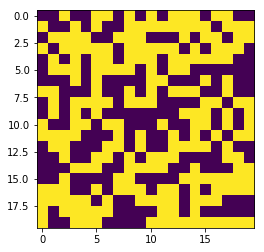

In [3]:
plt.imshow(img)

In [4]:
visited = np.zeros(dim, dtype=bool)

In [5]:
def four_way(out, i, j, color):
    if i < 0 or i >= dim[0]:
        return
    if j < 0 or j >= dim[1]:
        return
    if visited[i][j] or img[i][j] == 0:
        return
    visited[i][j] = True
    out[i][j] = color
    four_way(out, i - 1, j, color)
    four_way(out, i + 1, j, color)
    four_way(out, i, j - 1, color)
    four_way(out, i, j + 1, color)

In [6]:
def eight_way(out, i, j, color):
    if i < 0 or i >= dim[0]:
        return
    if j < 0 or j >= dim[1]:
        return
    if visited[i][j] or img[i][j] == 0:
        return
    visited[i][j] = True
    out[i][j] = color
    eight_way(out,i+1,j+1,color)
    eight_way(out,i+1,j,color)
    eight_way(out,i+1,j-1,color)
    eight_way(out,i,j+1,color)
    eight_way(out,i,j-1,color)
    eight_way(out,i-1,j+1,color)
    eight_way(out,i-1,j,color)
    eight_way(out,i-1,j-1,color)

In [10]:
def d_way(out, i, j, color):
    if i < 0 or i >= dim[0]:
        return
    if j < 0 or j >= dim[1]:
        return
    if visited[i][j] or img[i][j] == 0:
        return
    visited[i][j] = True
    out[i][j] = color
    
    d_way(out,i+1,j-1,color)
    d_way(out,i+1,j+1,color)
    d_way(out,i-1,j+1,color)
    d_way(out,i-1,j+1,color)

In [7]:
def assign_color():
    color = np.random.randint(0, 255, 3)
    while color in usedcolor:
        color = np.random.randint(0, 255, 3)
    usedcolor.append(color)
    return color

### Four connected

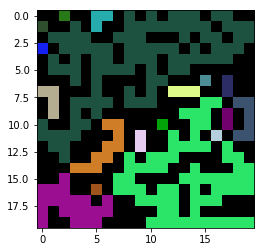

In [8]:
out = np.zeros(dim + (3, ), dtype=int)
usedcolor = []
for i in range(dim[0]):
    for j in range(dim[1]):
        if visited[i][j]:
            continue
        color = np.random.randint(0, 255, 3)
        four_way(out, i, j, color)
plt.imshow(out)

### Eight connected

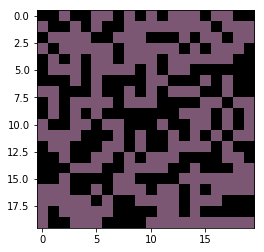

In [9]:
for i in range(dim[0]):
    for j in range(dim[1]):
        visited[i][j] = False

out = np.zeros(dim + (3, ), dtype=int)

for i in range(dim[0]):
    for j in range(dim[1]):
        if visited[i][j]:
            continue
        color = np.random.randint(0, 255, 3)
        eight_way(out, i, j, color)
plt.imshow(out)

### Nd connected (diagonals)

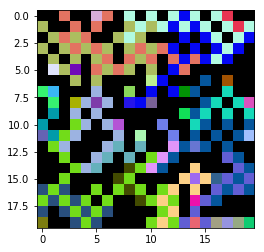

In [11]:
for i in range(dim[0]):
    for j in range(dim[1]):
        visited[i][j] = False

out = np.zeros(dim + (3, ), dtype=int)

for i in range(dim[0]):
    for j in range(dim[1]):
        if visited[i][j]:
            continue
        color = np.random.randint(0, 255, 3)
        d_way(out, i, j, color)
plt.imshow(out)